# Predicting Continuous Target Variables with Regression Analysis

# Introducing a simple linear regression model

# Exploring the Housing dataset

Source: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

In [15]:
import pandas as pd
import numpy as np
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
#                  'housing/housing.data',
#                  header=None,
#                  sep='\s+')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_data = boston.data

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = pd.DataFrame(boston_data)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
Y = boston.target
Y.shape

(506,)

In [6]:
type(Y)

numpy.ndarray

In [7]:
df = pd.concat([X,pd.DataFrame(Y)], axis=1)

In [8]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

## Visualizing the important characteristics of a dataset

C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


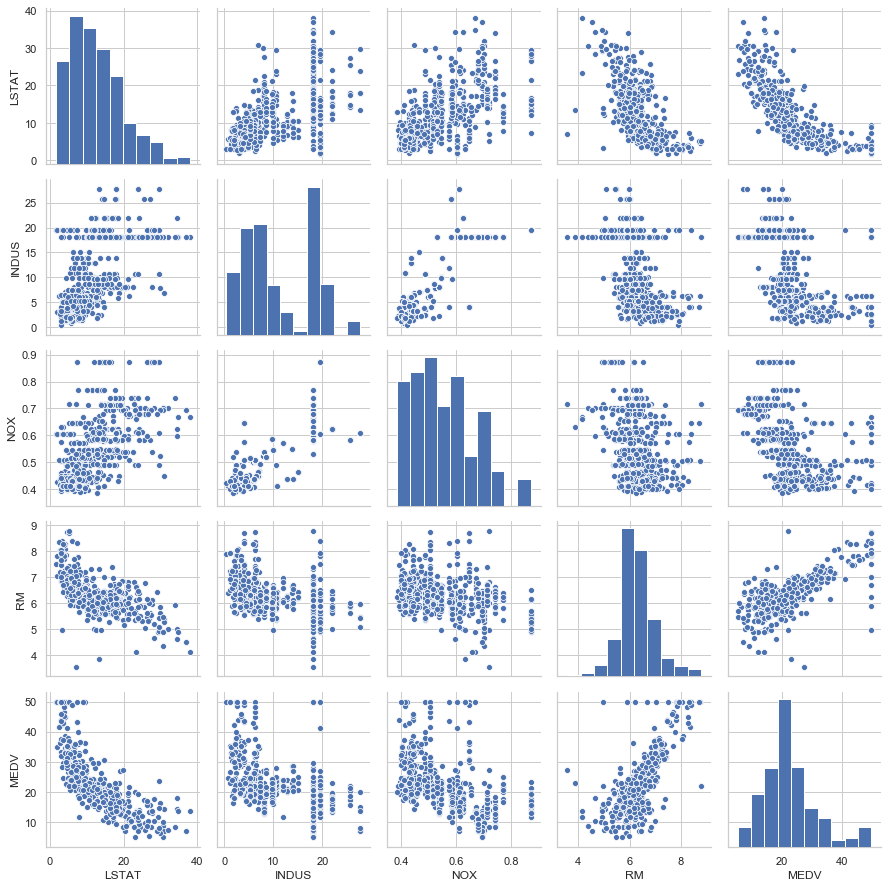

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

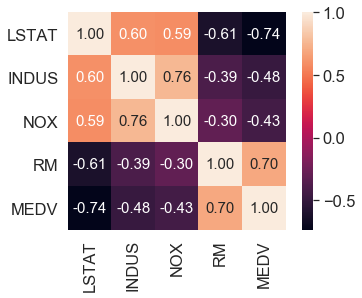

In [19]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

# plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

In [20]:
sns.reset_orig()
%matplotlib inline

<br>
<br>

# Implementing an ordinary least squares linear regression model

## Solving regression for regression parameters with gradient descent

In [16]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.0001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [17]:
X = df[['RM']].values
# y = df['MEDV'].values

In [12]:
type(X)

numpy.ndarray

In [13]:
y = Y

In [25]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(Y.reshape(-1,1))

In [27]:
y_std.shape

(506, 1)

In [71]:
lr = LinearRegressionGD(eta=0.00001, n_iter=20)
lr.fit(X, y)

In [20]:
X.shape

(506, 1)

In [32]:
type(X_std)

numpy.ndarray

In [29]:
X_std.shape

(506, 1)

In [57]:
lr = LinearRegressionGD(eta=0.00001, n_iter=100)
lr.fit(X, y)

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

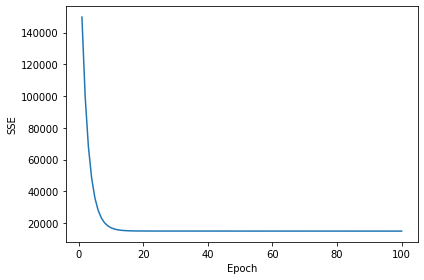

In [59]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [69]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

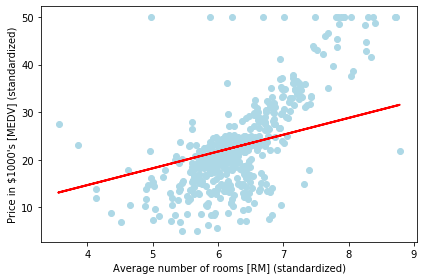

In [72]:
lin_regplot(X, y, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()

In [73]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 3.536
Intercept: 0.512


In [74]:
num_rooms = np.array([[5.0]])
price = lr.predict(num_rooms)
print("Price in $1000's: %.3f" % price)

Price in $1000's: 18.193


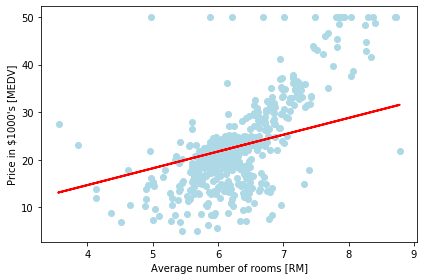

In [75]:
# Residual plots for the GD
lin_regplot(X, y, lr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

<br>
<br>

## Estimating the coefficient of a regression model via scikit-learn

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
slr = LinearRegression()
slr.fit(X, y)  #training step >> which "learns" the model coeff from data
y_pred = slr.predict(X)   # we can now use the model for prediction
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


In [78]:
y_train_pred = lr.predict(y_train)

ValueError: shapes (354,) and (1,) not aligned: 354 (dim 0) != 1 (dim 0)

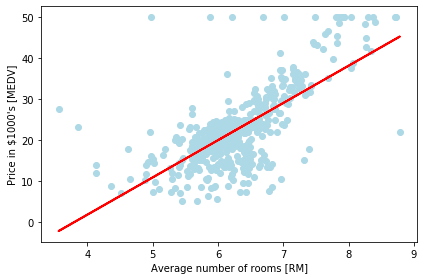

In [65]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

**Normal Equations** alternative:

In [66]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


<br>
<br>

# Evaluating the performance of linear regression models

In [77]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,\
                                                    random_state=0)

In [53]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

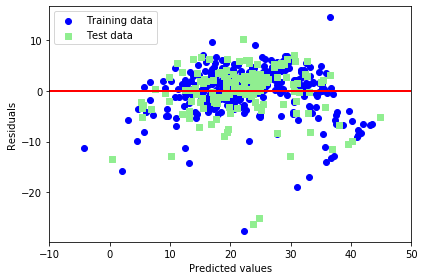

In [54]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [114]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 22.070, test: 29.760
R^2 train: 0.740, test: 0.643


<br>
<br>

<br>
<br>

# Using regularized methods for regression

In [56]:
slr.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [57]:
slr.intercept_

37.93710774183255

In [94]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.0926693   0.04820685 -0.01406582  0.         -0.          2.44619324
 -0.00279111 -0.99274477  0.20992275 -0.01388192 -0.85539024  0.00750462
 -0.62386874]


In [59]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 22.070, test: 29.760
R^2 train: 0.740, test: 0.643


In [60]:
from sklearn.linear_model import Ridge

lasso = Ridge(alpha=0.5)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-1.19303658e-01  4.55438481e-02 -1.00561110e-02  2.49465434e+00
 -1.09446544e+01  3.89132428e+00 -1.53100490e-02 -1.43199695e+00
  2.26086846e-01 -1.14300542e-02 -9.60260011e-01  7.11468468e-03
 -4.91044270e-01]


In [61]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.040, test: 27.523
R^2 train: 0.764, test: 0.669


<br>
<br>

# Turning a linear regression model into a curve - polynomial regression

In [98]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [99]:
X.shape

(10, 1)

In [100]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly.fit_transform(X)

In [101]:
X.shape

(10, 1)

In [102]:
X_poly

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [103]:
X_poly.shape

(10, 3)

In [104]:
X_fit = np.arange(250, 600, 10).reshape(-1,1)
X_fit.shape

(35, 1)

In [105]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10).reshape(-1,1)
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_poly, y)
y_poly_fit = pr.predict(poly.fit_transform(X_fit))

# regul_reg.fit(X_quad, y)
# y_quad_fit_regul = regul_reg.predict(quadratic.fit_transform(X_fit))

In [107]:
pr.coef_

array([ 0.00000000e+00,  2.39893018e+00, -2.25020109e-03])

In [108]:
pr.intercept_

-243.228777400308

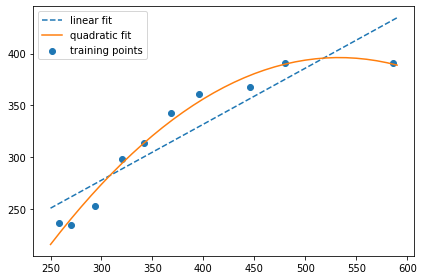

In [109]:
# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_poly_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/poly_example.png', dpi=300)
plt.show()

# Regularised Polynomial Regression

In [136]:
regul_reg = Lasso(alpha=-.5)
pr = LinearRegression()
poly = PolynomialFeatures(degree=3, interaction_only=False)
X_poly = poly.fit_transform(X)

In [137]:
regul_reg.fit(X_poly, y)
pr.fit(X_poly, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304.6272893659039, tolerance: 3.3856083999999997
  positive)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
# y_lin_pred = lr.predict(X)
y_regul_pred = regul_reg.predict(X_poly)
y_poly_pred = pr.predict(X_poly)

In [139]:
print('Training MSE Poly: %.3f, Regularised Poly: %.3f' % (
        mean_squared_error(y, y_poly_pred),
        mean_squared_error(y, y_regul_pred)))
print('Training R^2 Poly: %.3f, Regularised Poly: %.3f' % (
        r2_score(y, y_poly_pred),
        r2_score(y, y_regul_pred)))

Training MSE Poly: 61.084, Regularised Poly: 62.739
Training R^2 Poly: 0.982, Regularised Poly: 0.981


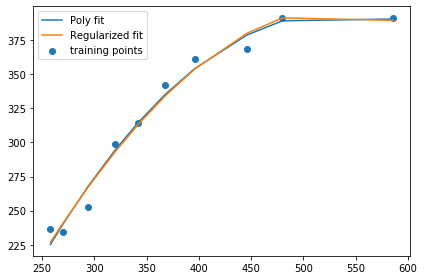

In [140]:
# plot results
plt.scatter(X, y, label='training points')
# plt.plot(X, y_lin_pred, label='linear fit', linestyle='--')
plt.plot(X, y_poly_pred, label='Poly fit', )
plt.plot(X, y_regul_pred, label='Regularized fit')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/poly_example.png', dpi=300)
plt.show()

In [133]:
regul_reg.coef_

array([ 0.00000000e+00,  1.92514594e+00, -7.87998724e-04, -9.04592908e-07,
       -9.79695818e-10, -8.08902387e-13, -2.53810743e-16,  8.17286082e-19,
        2.53376158e-21,  5.02951393e-24])

In [134]:
regul_reg.intercept_

-198.55785521490168

In [135]:
pr.coef_

array([ 0.00000000e+00, -3.60399071e-11,  9.03398947e-15, -1.57353184e-13,
       -2.68454462e-11, -2.60516645e-09,  2.31341333e-11, -7.61896159e-14,
        1.10447638e-16, -5.94679494e-20])

<br>
<br>

## Modeling nonlinear relationships in the Housing Dataset (homework)

In [ ]:
# try to get the following graph

# ****  DONT EXECUTE THE FOLLOWING CELL. ****

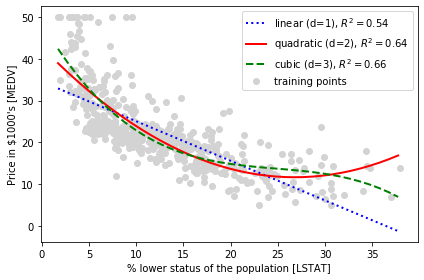

In [109]:
# ****  DONT EXECUTE THIS CELL. ****
# YOU WILL OTHERWISE  LOSE THE FIGURE BELOW

# Transforming the dataset:

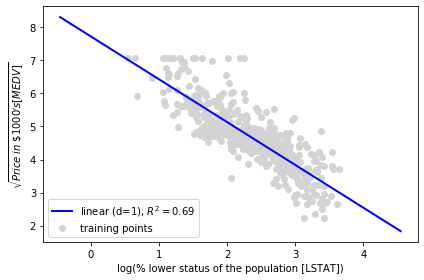

In [111]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1).reshape(-1,1)

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
# plt.savefig('./figures/transform_example.png', dpi=300)
plt.show()

<br>
<br>

# Dealing with nonlinear relationships using random forests

## Decision tree regression

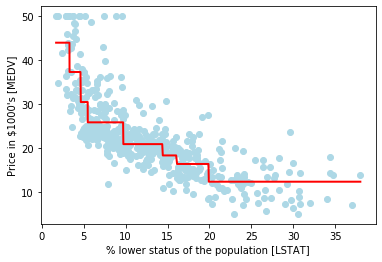

In [112]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
# plt.savefig('./figures/tree_regression.png', dpi=300)
plt.show()

<br>
<br>

## Random forest regression

In [113]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [114]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


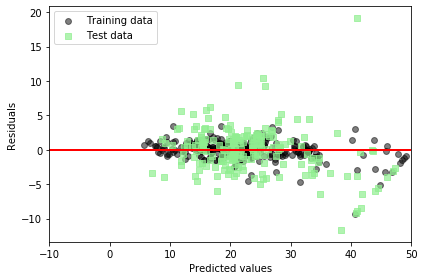

In [115]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

<br>
<br>